# IoT Network Traffic Management: CNN-LSTM Model Training

In this notebook, we will implement a Convolutional Neural Network (CNN) combined with Long Short-Term Memory (LSTM) networks to classify IoT network traffic data. This model will be trained on feature-selected datasets for different devices: archer, camera, and indoor.


## Importing Necessary Libraries

We will start by importing the necessary libraries for data manipulation, model building, and visualization.


In [12]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

## Dataset Paths

We define the paths to the feature-selected datasets for each device. This allows us to easily access the data during our analysis.


In [13]:
# Paths to the feature-selected datasets
selected_file_paths = {
    'archer': r'C:\Users\USER\IoT_Network_Traffic_Management\data\feature\selected_archer.csv',
    'camera': r'C:\Users\USER\IoT_Network_Traffic_Management\data\feature\selected_camera.csv',
    'indoor': r'C:\Users\USER\IoT_Network_Traffic_Management\data\feature\selected_indoor.csv'
}


## Data Loading and Preprocessing

The next step is to load and preprocess our data. We will standardize the features and reshape them to fit the CNN-LSTM model's requirements.


In [14]:
# Function to load and preprocess data
def load_data(device_name):
    df = pd.read_csv(selected_file_paths[device_name])
    X = df.drop(columns=['label']).values  # Features
    y = df['label'].values  # Target
    
    # Standardize features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    # Reshape X for CNN-LSTM (samples, timesteps, features)
    X = X.reshape((X.shape[0], 1, X.shape[1]))
    
    # One-hot encode target labels for CNN-LSTM
    y = to_categorical(y)
    
    return train_test_split(X, y, test_size=0.3, random_state=42)


## CNN-LSTM Model Creation

We will now define the CNN-LSTM model architecture. This model will consist of convolutional layers followed by LSTM layers to effectively capture spatial and temporal features in the data.


In [15]:

# Function to create the CNN-LSTM model
def create_cnn_lstm_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Dropout(0.3))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(2, activation='softmax'))  # Adjust based on the number of classes
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## Model Training and Visualization

We will now train our model and visualize the training process. The training metrics will be plotted to evaluate the model's performance over epochs.


In [16]:
# Function to train the model, save it, and visualize metrics
def train_save_and_visualize_model(device_name, X_train, y_train, X_test, y_test):
    input_shape = (X_train.shape[1], X_train.shape[2])
    model = create_cnn_lstm_model(input_shape)

    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, 
                        callbacks=[early_stopping])

    # Save the model
    model.save(f'IOT_{device_name.capitalize()}_model.h5')

    # Save training and testing metrics to a DataFrame
    metrics_df = pd.DataFrame({
        'Epoch': range(1, len(history.history['loss']) + 1),
        'Train_Loss': history.history['loss'],
        'Val_Loss': history.history['val_loss'],
        'Train_Accuracy': history.history['accuracy'],
        'Val_Accuracy': history.history['val_accuracy']
    })

    # Save metrics to CSV
    metrics_df.to_csv(f'IOT_{device_name.capitalize()}_training_metrics.csv', index=False)

    # Plotting training and validation metrics
    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(metrics_df['Epoch'], metrics_df['Train_Loss'], label='Train Loss', color='blue')
    plt.plot(metrics_df['Epoch'], metrics_df['Val_Loss'], label='Validation Loss', color='orange')
    plt.title(f'{device_name.capitalize()} Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(metrics_df['Epoch'], metrics_df['Train_Accuracy'], label='Train Accuracy', color='blue')
    plt.plot(metrics_df['Epoch'], metrics_df['Val_Accuracy'], label='Validation Accuracy', color='orange')
    plt.title(f'{device_name.capitalize()} Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.savefig(f'IOT_{device_name.capitalize()}_training_visualization.png')  # Save the plot
    plt.show()


## Training the Models

Finally, we will train, save, and visualize the models for each device. The training metrics will be recorded for analysis.


Epoch 1/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9747 - loss: 0.0777 - val_accuracy: 0.9998 - val_loss: 0.0029
Epoch 2/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.9995 - loss: 0.0038 - val_accuracy: 0.9998 - val_loss: 0.0019
Epoch 3/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9997 - loss: 0.0029 - val_accuracy: 0.9999 - val_loss: 0.0012
Epoch 4/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9997 - loss: 0.0019 - val_accuracy: 0.9999 - val_loss: 0.0012
Epoch 5/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9996 - loss: 0.0037 - val_accuracy: 0.9999 - val_loss: 0.0011
Epoch 6/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9996 - loss: 0.0022 - val_accuracy: 0.9999 - val_loss: 9.8744e-04
Epoch 7/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9999 - loss: 9.1971e-04 - val_accuracy: 0.9999 - val_loss: 0.0010
Epoch 8/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9999 -

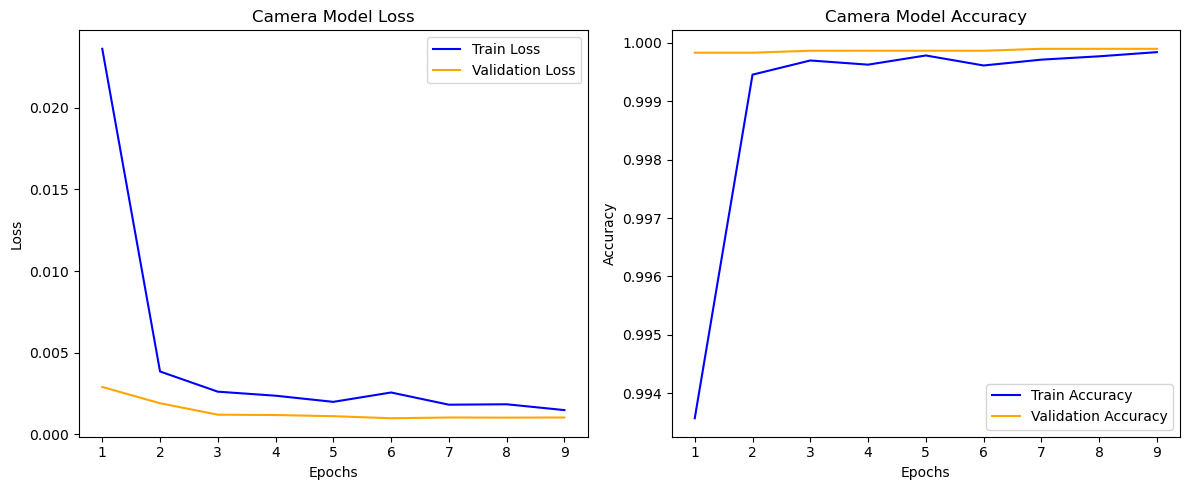

Epoch 1/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9780 - loss: 0.0724 - val_accuracy: 0.9998 - val_loss: 0.0024
Epoch 2/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9995 - loss: 0.0037 - val_accuracy: 0.9999 - val_loss: 0.0017
Epoch 3/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9996 - loss: 0.0026 - val_accuracy: 0.9999 - val_loss: 0.0012
Epoch 4/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9997 - loss: 0.0020 - val_accuracy: 0.9999 - val_loss: 0.0011
Epoch 5/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9998 - loss: 0.0020 - val_accuracy: 0.9999 - val_loss: 0.0011
Epoch 6/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9997 - loss: 0.0024 - val_accuracy: 0.9999 - val_loss: 0.0011
Epoch 7/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9997 - loss: 0.0015 - val_accuracy: 0.9999 - val_loss: 9.3866e-04
Epoch 8/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9997 - los

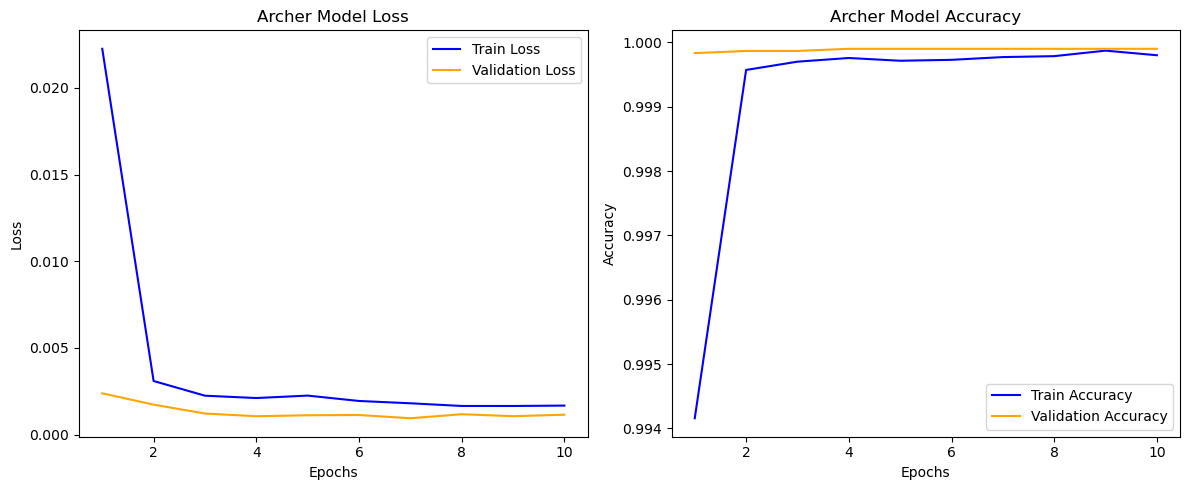

Epoch 1/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.9813 - loss: 0.0722 - val_accuracy: 0.9998 - val_loss: 0.0026
Epoch 2/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9993 - loss: 0.0045 - val_accuracy: 0.9999 - val_loss: 0.0014
Epoch 3/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.9998 - loss: 0.0012 - val_accuracy: 0.9999 - val_loss: 0.0012
Epoch 4/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9998 - loss: 0.0015 - val_accuracy: 0.9999 - val_loss: 0.0012
Epoch 5/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.9997 - loss: 0.0024 - val_accuracy: 0.9999 - val_loss: 0.0010
Epoch 6/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9998 - loss: 0.0014 - val_accuracy: 0.9999 - val_loss: 0.0011
Epoch 7/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9997 - loss: 0.0024 - val_accuracy: 0.9999 - val_loss: 0.0012
Epoch 8/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9998 - loss: 

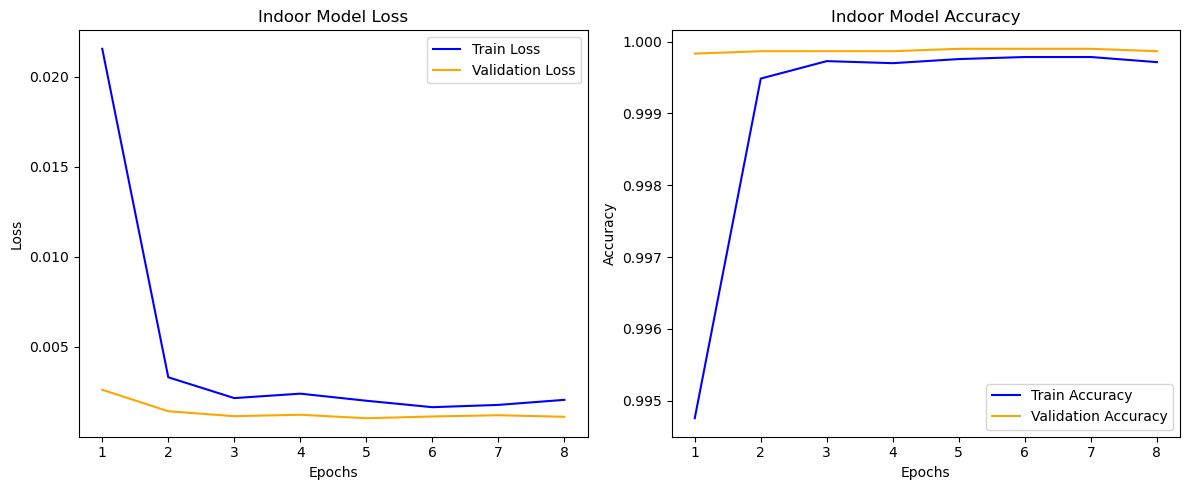

In [17]:
# Train, save, and visualize models for each device
for device in ['camera', 'archer', 'indoor']:
    # Assuming you have X_train, y_train, X_test, and y_test prepared for each device
    train_save_and_visualize_model(device, X_train, y_train, X_test, y_test)
